<a href="https://colab.research.google.com/github/monindew/all_of_DL/blob/main/All_of_DL16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("학습셋 이미지 수 : %d개) " % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개) " % (X_test.shape[0]))

학습셋 이미지 수 : 60000개) 
테스트셋 이미지 수 : 10000개) 


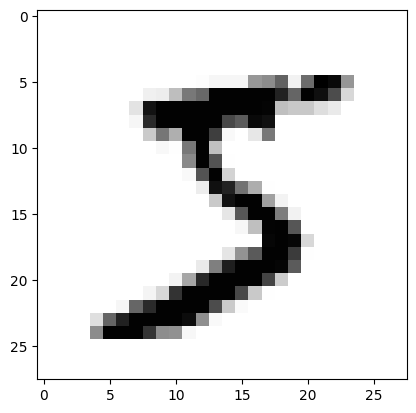

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [ ]:
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [ ]:
 X_train = X_train.astype("float64")
 X_train = X_train / 255

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 784).astype("float64") / 255

In [ ]:
print("class : %d " % (y_train[0]))

class : 5 


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
modelpath = "./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18979, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18979 to 0.14101, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.14101 to 0.11610, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11610 to 0.10570, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10570 to 0.09417, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09417 to 0.08593, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08593 to 0.08148, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08148 to 0.07818, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.07818

Epoch 10: val_loss improved from 0.07818 to 0.07758, saving model to ./MNIST_MLP.keras

Epoch 11: val_loss did not improve from 0.07758

Epoch 12: val_loss did not improve from 0.07758

Epoch 13: val_loss did not improve from 0.07758

Epoch 14: val_loss did n

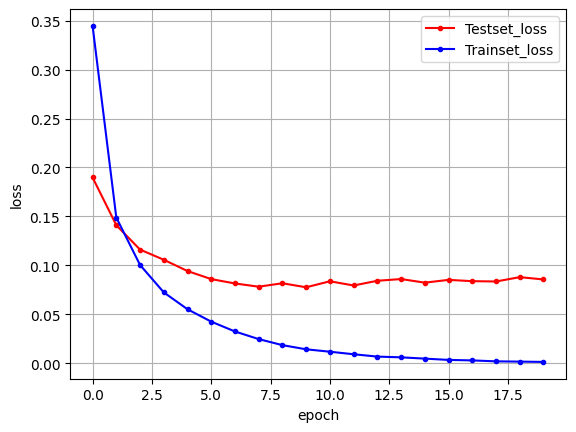

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len ,y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


Epoch 1: val_loss improved from inf to 0.08176, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08176 to 0.05531, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05531 to 0.04888, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04888 to 0.04501, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss did not improve from 0.04501

Epoch 6: val_loss did not improve from 0.04501

Epoch 7: val_loss did not improve from 0.04501

Epoch 8: val_loss improved from 0.04501 to 0.04237, saving model to ./MNIST_CNN.keras

Epoch 9: val_loss improved from 0.04237 to 0.04112, saving model to ./MNIST_CNN.keras

Epoch 10: val_loss did not improve from 0.04112

Epoch 11: val_loss did not improve from 0.04112

Epoch 12: val_loss did not improve from 0.04112

Epoch 13: val_loss did not improve from 0.04112

Epoch 14: val_loss did not improve from 0.04112

Epoch 15: val_loss did not improve from 0.04112

Epoch 16: val_loss did not improve from 0.0

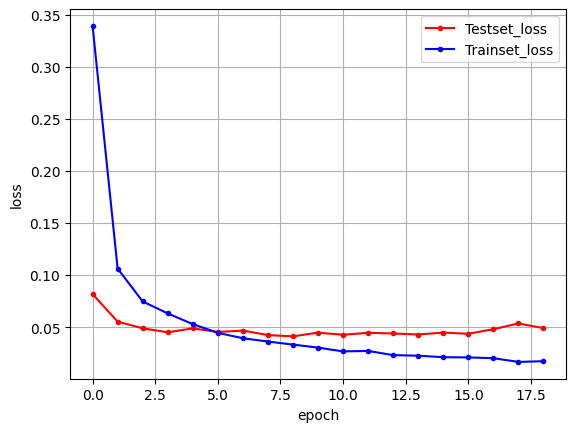

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 25
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelpath = "./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len ,y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
